In [1]:
import mysql.connector
import pandas as pd
import settings
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [2]:
db_connection = mysql.connector.connect(
        host="localhost",
        user="root",
        passwd="YUrio_123",
        port="3306",
        database="twitterdb",
        charset = 'utf8'
    )

In [3]:
query = "SELECT * FROM {} where sentimen_tweet = 'positif'; ".format(settings.TABLE_NAME)
df_pos = pd.read_sql(query, con=db_connection)

query = "SELECT * FROM {} where sentimen_tweet = 'netral'; ".format(settings.TABLE_NAME)
df_net = pd.read_sql(query, con=db_connection)

query = "SELECT * FROM {} where sentimen_tweet = 'negatif'; ".format(settings.TABLE_NAME)
df_neg = pd.read_sql(query, con=db_connection)

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [5]:
data_pos = df_pos.clean_tweet.values.tolist()
data_words_pos = list(sent_to_words(data_pos))

data_net = df_net.clean_tweet.values.tolist()
data_words_net = list(sent_to_words(data_net))

data_neg = df_neg.clean_tweet.values.tolist()
data_words_neg = list(sent_to_words(data_neg))

In [6]:
# Build the bigram and trigram models from positif sentimen
bigram_pos = gensim.models.Phrases(data_words_pos, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram_pos = gensim.models.Phrases(bigram_pos[data_words_pos], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram from positif sentimen
bigram_mod_pos = gensim.models.phrases.Phraser(bigram_pos)
trigram_mod_pos = gensim.models.phrases.Phraser(trigram_pos)

# Build the bigram and trigram models from netral sentimen
bigram_net = gensim.models.Phrases(data_words_net, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram_net = gensim.models.Phrases(bigram_net[data_words_net], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram from netral sentimen
bigram_mod_net = gensim.models.phrases.Phraser(bigram_net)
trigram_mod_net = gensim.models.phrases.Phraser(trigram_net)

# Build the bigram and trigram models from negatif sentimen
bigram_neg = gensim.models.Phrases(data_words_neg, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram_neg = gensim.models.Phrases(bigram_neg[data_words_neg], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram from negatif sentimen
bigram_mod_neg = gensim.models.phrases.Phraser(bigram_neg)
trigram_mod_neg = gensim.models.phrases.Phraser(trigram_neg)

In [7]:
def make_bigrams(texts,bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts,bigram_mod,trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [8]:
# Form Bigrams from positif sentimen
data_words_bigrams_pos = make_bigrams(data_words_pos,bigram_mod_pos)
data_words_trigrams_pos = make_trigrams(data_words_pos,bigram_mod_pos,trigram_mod_pos)

# Form Bigrams from netral sentimen
data_words_bigrams_net = make_bigrams(data_words_net,bigram_mod_net)
data_words_trigrams_net = make_trigrams(data_words_net,bigram_mod_net,trigram_mod_net)

# Form Bigrams from negatif sentimen
data_words_bigrams_neg = make_bigrams(data_words_neg,bigram_mod_neg)
data_words_trigrams_neg = make_trigrams(data_words_neg,bigram_mod_neg,trigram_mod_neg)

In [9]:
# Create Dictionary from sentimen positif bigrams
id2word_bi_pos = corpora.Dictionary(data_words_bigrams_pos)
# Create Corpus from sentimen positif bigrams
texts_bi_pos = data_words_bigrams_pos
# Term Document Frequency from sentimen positif bigrams
corpus_bi_pos = [id2word_bi_pos.doc2bow(text) for text in texts_bi_pos]
# View from sentimen positif bigrams
print(corpus_bi_pos[:1][0][:30])


# Create Dictionary from sentimen positif trigrams
id2word_tri_pos = corpora.Dictionary(data_words_trigrams_pos)
# Create Corpus from sentimen positif trigrams
texts_tri_pos = data_words_trigrams_pos
# Term Document Frequency from sentimen positif trigrams
corpus_tri_pos = [id2word_tri_pos.doc2bow(text) for text in texts_tri_pos]
# View from sentimen positif trigrams
print(corpus_tri_pos[:1][0][:30])


# Create Dictionary from sentimen netral bigrams
id2word_bi_net = corpora.Dictionary(data_words_bigrams_net)
# Create Corpus from sentimen netral bigrams
texts_bi_net = data_words_bigrams_net
# Term Document Frequency from sentimen netral bigrams
corpus_bi_net = [id2word_bi_net.doc2bow(text) for text in texts_bi_net]
# View from sentimen netral bigrams
print(corpus_bi_net[:1][0][:30])

# Create Dictionary from sentimen netral trigrams
id2word_tri_net = corpora.Dictionary(data_words_trigrams_net)
# Create Corpus from sentimen netral trigrams
texts_tri_net = data_words_trigrams_net
# Term Document Frequency from sentimen netral trigrams
corpus_tri_net = [id2word_tri_net.doc2bow(text) for text in texts_tri_net]
# View from sentimen netral trigrams
print(corpus_tri_net[:1][0][:30])


# Create Dictionary from sentimen negatif bigrams
id2word_bi_neg = corpora.Dictionary(data_words_bigrams_neg)
# Create Corpus from sentimen negatif bigrams
texts_bi_neg = data_words_bigrams_neg
# Term Document Frequency from sentimen negatif bigrams
corpus_bi_neg = [id2word_bi_neg.doc2bow(text) for text in texts_bi_neg]
# View from sentimen negatif bigrams
print(corpus_bi_neg[:1][0][:30])

# Create Dictionary from sentimen negatif trigrams
id2word_tri_neg = corpora.Dictionary(data_words_trigrams_neg)
# Create Corpus from sentimen negatif trigrams
texts_tri_neg = data_words_trigrams_neg
# Term Document Frequency from sentimen negatif trigrams
corpus_tri_neg = [id2word_tri_neg.doc2bow(text) for text in texts_tri_neg]
# View from sentimen negatif trigrams
print(corpus_tri_neg[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2)]


In [10]:
#----------------------------------------------------------------------
# Build LDA model from sentimen positif bigrams
lda_model_bi_pos = gensim.models.LdaMulticore(corpus=corpus_bi_pos,
                                       id2word=id2word_bi_pos,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model_bi_pos.print_topics())
doc_lda_bi_pos = lda_model_bi_pos[corpus_bi_pos]

# Build LDA model from sentimen positif trigrams
lda_model_tri_pos = gensim.models.LdaMulticore(corpus=corpus_tri_pos,
                                       id2word=id2word_tri_pos,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model_tri_pos.print_topics())
doc_lda_tri_pos = lda_model_tri_pos[corpus_tri_pos]

[(0,
  '0.045*"jokowi" + 0.040*"masyarakat" + 0.039*"presiden" + 0.038*"menyapa" + '
  '0.038*"berolahraga" + 0.038*"intoleransi" + 0.029*"pak" + 0.019*"takut" + '
  '0.019*"melawan" + 0.018*"tegas"'),
 (1,
  '0.038*"yg" + 0.020*"dan" + 0.018*"presiden" + 0.017*"atau" + 0.017*"itu" + '
  '0.016*"negara" + 0.016*"ahok" + 0.013*"peka" + 0.012*"dg_dilabeli" + '
  '0.012*"disalahin_umat"'),
 (2,
  '0.035*"pak" + 0.029*"jokowi" + 0.015*"dprd" + 0.014*"communist_and" + '
  '0.014*"islam" + 0.014*"regime_is" + 0.014*"above_of" + 0.014*"pro_china" + '
  '0.014*"te" + 0.014*"are_people"'),
 (3,
  '0.039*"jokowi" + 0.032*"rakyat" + 0.022*"punya" + 0.018*"yang" + '
  '0.017*"thn" + 0.015*"dr" + 0.015*"terwujud_skrg" + '
  '0.015*"presidennya_mimpi" + 0.015*"orang_sumatera" + 0.015*"jalan_toll"'),
 (4,
  '0.056*"yg" + 0.041*"jokowi" + 0.021*"ada" + 0.021*"namanya" + '
  '0.016*"jokowimarufamin" + 0.016*"periode" + 0.015*"baru" + 0.012*"mau" + '
  '0.011*"bukan" + 0.011*"tetap"'),
 (5,
  '0.027*"jo

In [11]:
#----------------------------------------------------------------------
# Build LDA model from sentimen netral bigrams
lda_model_bi_net = gensim.models.LdaMulticore(corpus=corpus_bi_net,
                                       id2word=id2word_bi_net,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model_bi_net.print_topics())
doc_lda_bi_net = lda_model_bi_net[corpus_bi_net]

# Build LDA model from sentimen netral trigrams
lda_model_tri_net = gensim.models.LdaMulticore(corpus=corpus_tri_net,
                                       id2word=id2word_tri_net,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model_tri_net.print_topics())
doc_lda_tri_net = lda_model_tri_net[corpus_tri_net]

[(0,
  '0.070*"di" + 0.061*"pak" + 0.051*"mohon" + 0.050*"depan" + 0.050*"biasanya" '
  '+ 0.049*"ijin" + 0.049*"ngawal" + 0.018*"ternyata_eh" + 0.010*"ternyata" + '
  '0.009*"pemenang"'),
 (1,
  '0.039*"jokowi" + 0.030*"yang" + 0.027*"mau" + 0.027*"percaya" + '
  '0.027*"mana" + 0.025*"ra_dong" + 0.024*"kembali_lagi" + 0.024*"vs_joko" + '
  '0.024*"widodo_lalu" + 0.011*"ahok"'),
 (2,
  '0.040*"jokowi" + 0.026*"yang" + 0.019*"bapak" + 0.019*"di" + 0.015*"pak" + '
  '0.014*"ini" + 0.013*"menteri" + 0.012*"pemerintah" + 0.012*"id" + '
  '0.012*"kita"'),
 (3,
  '0.048*"kota" + 0.046*"ibu" + 0.030*"di" + 0.028*"ke" + 0.025*"negara" + '
  '0.024*"kalimantan" + 0.023*"desain" + 0.023*"langsung" + 0.022*"dalam" + '
  '0.022*"sayembara"'),
 (4,
  '0.035*"kita" + 0.033*"jokowi" + 0.024*"impor" + 0.023*"rezim" + 0.023*"pak" '
  '+ 0.022*"atau" + 0.020*"mau" + 0.018*"keluar_dari" + 0.018*"saya_tanya" + '
  '0.017*"tidak"'),
 (5,
  '0.027*"jokowi" + 0.019*"mulai_sering" + 0.019*"hukum_sikap" + '
 

In [12]:
#----------------------------------------------------------------------
# Build LDA model from sentimen negatif bigrams
lda_model_bi_neg = gensim.models.LdaMulticore(corpus=corpus_bi_neg,
                                       id2word=id2word_bi_neg,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model_bi_neg.print_topics())
doc_lda_bi_neg = lda_model_bi_neg[corpus_bi_neg]

# Build LDA model from sentimen negatif trigrams
lda_model_tri_neg = gensim.models.LdaMulticore(corpus=corpus_tri_neg,
                                       id2word=id2word_tri_neg,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model_tri_neg.print_topics())
doc_lda_tri_neg = lda_model_tri_neg[corpus_tri_neg]

[(0,
  '0.016*"negara" + 0.012*"diri" + 0.012*"inilah" + 0.012*"kita" + '
  '0.012*"biodiesel" + 0.012*"ikhtiar" + 0.012*"ketergantungan" + '
  '0.012*"percepatan" + 0.012*"energi" + 0.012*"melepaskan"'),
 (1,
  '0.018*"di" + 0.018*"saudaraku" + 0.018*"kegembiraan" + 0.018*"semoga" + '
  '0.018*"tanah" + 0.018*"seluruh" + 0.018*"umat" + 0.018*"kepada" + '
  '0.018*"kedamaian" + 0.018*"kristiani"'),
 (2,
  '0.035*"yang" + 0.032*"lo" + 0.022*"jokowi" + 0.022*"aja" + 0.022*"bukan" + '
  '0.019*"natal" + 0.019*"bawah" + 0.019*"deh" + 0.019*"perasaan" + '
  '0.019*"takut"'),
 (3,
  '0.031*"ini" + 0.024*"di" + 0.021*"jokowi" + 0.021*"impian" + 0.016*"sama" + '
  '0.016*"pak" + 0.013*"yang" + 0.013*"ada" + 0.011*"gak" + 0.011*"satu"'),
 (4,
  '0.020*"aku" + 0.012*"presiden" + 0.012*"gk" + 0.012*"gak" + 0.008*"ada" + '
  '0.008*"dia" + 0.008*"nya" + 0.008*"yg" + 0.008*"masalah" + 0.008*"btp"'),
 (5,
  '0.017*"aja" + 0.015*"yg" + 0.014*"nya" + 0.012*"kasus" + 0.012*"mas" + '
  '0.009*"ga" + 0.0

In [13]:
#------------------------------------------------------------------
# Compute Coherence Score from bigram sentimen positif
coherence_model_lda_bi_pos = CoherenceModel(model=lda_model_bi_pos, texts=data_words_bigrams_pos, dictionary=id2word_bi_pos, coherence='c_v')
coherence_lda_bi_pos = coherence_model_lda_bi_pos.get_coherence()
print('Coherence Score: ', coherence_lda_bi_pos)

# Compute Coherence Score from trigram sentimen positif
coherence_model_lda_tri_pos = CoherenceModel(model=lda_model_tri_pos, texts=data_words_trigrams_pos, dictionary=id2word_tri_pos, coherence='c_v')
coherence_lda_tri_pos = coherence_model_lda_tri_pos.get_coherence()
print('Coherence Score: ', coherence_lda_tri_pos)

Coherence Score:  0.32641926530283744
Coherence Score:  0.36774502039166335


In [14]:
#------------------------------------------------------------------
# Compute Coherence Score from bigram sentimen netral
coherence_model_lda_bi_net = CoherenceModel(model=lda_model_bi_net, texts=data_words_bigrams_net, dictionary=id2word_bi_net, coherence='c_v')
coherence_lda_bi_net = coherence_model_lda_bi_net.get_coherence()
print('Coherence Score: ', coherence_lda_bi_net)

# Compute Coherence Score from trigram sentimen netral
coherence_model_lda_tri_net = CoherenceModel(model=lda_model_tri_net, texts=data_words_trigrams_net, dictionary=id2word_tri_net, coherence='c_v')
coherence_lda_tri_net = coherence_model_lda_tri_net.get_coherence()
print('Coherence Score: ', coherence_lda_tri_net)

Coherence Score:  0.41722127250425095
Coherence Score:  0.4186929943661294


In [15]:
#------------------------------------------------------------------
# Compute Coherence Score from bigram sentimen negatif 
coherence_model_lda_bi_neg = CoherenceModel(model=lda_model_bi_neg, texts=data_words_bigrams_neg, dictionary=id2word_bi_neg, coherence='c_v')
coherence_lda_bi_neg = coherence_model_lda_bi_neg.get_coherence()
print('Coherence Score: ', coherence_lda_bi_neg)

# Compute Coherence Score from trigram sentimen negatif
coherence_model_lda_tri_neg = CoherenceModel(model=lda_model_tri_neg, texts=data_words_trigrams_neg, dictionary=id2word_tri_neg, coherence='c_v')
coherence_lda_tri_neg = coherence_model_lda_tri_neg.get_coherence()
print('Coherence Score: ', coherence_lda_tri_neg)

Coherence Score:  0.49459442107212037
Coherence Score:  0.4830990058070309


In [16]:
def compute_coherence_values(corpus, dictionary, k, a, b,data_lemmatized,id2word):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [17]:
def get_coherence_max(corpus_data,id2word,data_words,title_data):
  grid = {}
  grid['Validation_Set'] = {}

  # Topics range
  min_topics = 2
  max_topics = 11
  step_size = 1
  topics_range = range(min_topics, max_topics, step_size)

  # Alpha parameter
  alpha = list(np.arange(0.01, 1, 0.3))
  alpha.append('symmetric')
  alpha.append('asymmetric')

  # Beta parameter
  beta = list(np.arange(0.01, 1, 0.3))
  beta.append('symmetric')

  # Validation sets
  num_of_docs = len(corpus_data)
  corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
                 # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
                 # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
                 corpus_data]

  corpus_title = [title_data]

  model_results = {'Validation_Set': [],
                   'Topics': [],
                   'Alpha': [],
                   'Beta': [],
                   'Coherence': []
                  }

  # Can take a long time to run
  if 1 == 1:
      pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
      
      # iterate through validation corpuses
      for i in range(len(corpus_sets)):
          # iterate through number of topics
          for k in topics_range:
              # iterate through alpha values
              for a in alpha:
                  # iterare through beta values
                  for b in beta:
                      # get the coherence score for the given parameters
                      cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                    k=k, a=a, b=b,data_lemmatized=data_words,id2word=id2word)
                      # Save the model results
                      model_results['Validation_Set'].append(corpus_title[i])
                      model_results['Topics'].append(k)
                      model_results['Alpha'].append(a)
                      model_results['Beta'].append(b)
                      model_results['Coherence'].append(cv)
                      
                      pbar.update(1)
      pd.DataFrame(model_results).to_csv('lda_tuning_results_{}.csv'.format(title_data), index=False)
      pbar.close()

In [18]:
get_coherence_max(corpus_bi_pos,id2word_bi_pos,data_words_bigrams_pos,"sentimen_bi_pos")

100%|██████████| 270/270 [12:42<00:00,  2.82s/it]


In [19]:
get_coherence_max(corpus_tri_pos,id2word_tri_pos,data_words_trigrams_pos,"sentimen_tri_pos")

100%|██████████| 270/270 [11:59<00:00,  2.66s/it]


In [20]:
get_coherence_max(corpus_bi_net,id2word_bi_net,data_words_bigrams_net,"sentimen_bi_net")

100%|██████████| 270/270 [36:09<00:00,  8.03s/it]   


In [21]:
get_coherence_max(corpus_tri_net,id2word_tri_net,data_words_trigrams_net,"sentimen_tri_net")

100%|██████████| 270/270 [25:31<00:00,  5.67s/it]


In [22]:
get_coherence_max(corpus_bi_neg,id2word_bi_neg,data_words_bigrams_neg,"sentimen_bi_neg")

100%|██████████| 270/270 [09:09<00:00,  2.04s/it]


In [23]:
get_coherence_max(corpus_tri_neg,id2word_tri_neg,data_words_trigrams_neg,"sentimen_tri_neg")

100%|██████████| 270/270 [09:15<00:00,  2.06s/it]


In [45]:
def get_max_param(file_path):
    df = pd.read_csv(file_path).sort_values(['Coherence'], ascending=False)
    return df.iloc[0]
# df_tes.sort('Coherence', ascending=False)

In [64]:
df_bi_pos_param = pd.read_csv("lda_tuning_results_sentimen_bi_pos.csv").sort_values(['Coherence'], ascending=True)
df_tri_pos_param = pd.read_csv("lda_tuning_results_sentimen_tri_pos.csv").sort_values(['Coherence'], ascending=True)

df_bi_net_param = pd.read_csv("lda_tuning_results_sentimen_bi_net.csv").sort_values(['Coherence'], ascending=True)
df_tri_net_param = pd.read_csv("lda_tuning_results_sentimen_tri_net.csv").sort_values(['Coherence'], ascending=True)

df_bi_neg_param = pd.read_csv("lda_tuning_results_sentimen_bi_neg.csv").sort_values(['Coherence'], ascending=True)
df_tri_neg_param = pd.read_csv("lda_tuning_results_sentimen_tri_neg.csv").sort_values(['Coherence'], ascending=True)

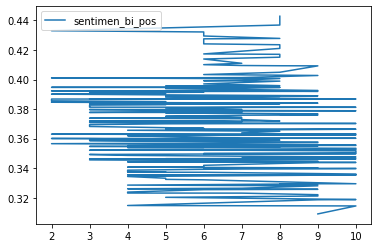

In [65]:
plt.plot(df_bi_pos_param["Topics"], df_bi_pos_param["Coherence"])
plt.legend(['sentimen_bi_pos'], loc='upper left')

plt.show()

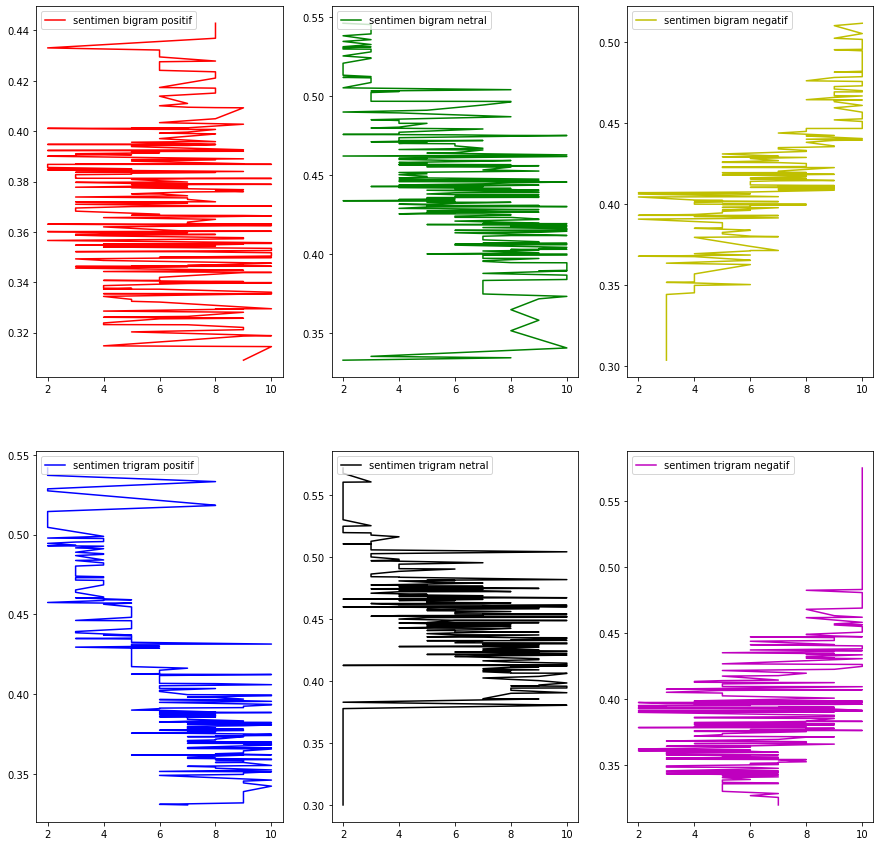

In [69]:
fig, ax = plt.subplots(2, 3, figsize=(15,15))

# f, axs = plt.subplots(2,2,figsize=(15,15))

ax[0, 0].plot(df_bi_pos_param["Topics"], df_bi_pos_param["Coherence"], 'r', label='sentimen bigram positif') #row=0, col=0
ax[0, 0].legend(loc="upper left")
ax[1, 0].plot(df_tri_pos_param["Topics"], df_tri_pos_param["Coherence"], 'b', label='sentimen trigram positif') #row=1, col=0
ax[1, 0].legend(loc="upper left")

ax[0, 1].plot(df_bi_net_param["Topics"], df_bi_net_param["Coherence"], 'g', label='sentimen bigram netral') #row=0, col=1
ax[0, 1].legend(loc="upper left")
ax[1, 1].plot(df_tri_net_param["Topics"], df_tri_net_param["Coherence"], 'k', label='sentimen trigram netral') #row=1, col=1
ax[1, 1].legend(loc="upper left")

ax[0, 2].plot(df_bi_neg_param["Topics"], df_bi_neg_param["Coherence"], 'y', label='sentimen bigram negatif') #row=0, col=2
ax[0, 2].legend(loc="upper left")
ax[1, 2].plot(df_tri_neg_param["Topics"], df_tri_neg_param["Coherence"], 'm', label='sentimen trigram negatif') #row=1, col=2
ax[1, 2].legend(loc="upper left")
plt.show()


# 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'

In [52]:
print(get_max_param("lda_tuning_results_sentimen_bi_pos.csv"))
print("\n")
print(get_max_param("lda_tuning_results_sentimen_tri_pos.csv"))
print("\n")
print(get_max_param("lda_tuning_results_sentimen_bi_net.csv"))
print("\n")
print(get_max_param("lda_tuning_results_sentimen_tri_net.csv"))
print("\n")
print(get_max_param("lda_tuning_results_sentimen_bi_neg.csv"))
print("\n")
print(get_max_param("lda_tuning_results_sentimen_tri_neg.csv"))

Validation_Set    sentimen_bi_pos
Topics                          8
Alpha                  asymmetric
Beta                         0.61
Coherence                0.442875
Name: 207, dtype: object


Validation_Set    sentimen_tri_pos
Topics                           2
Alpha                   asymmetric
Beta                          0.61
Coherence                 0.541809
Name: 27, dtype: object


Validation_Set    sentimen_bi_net
Topics                          2
Alpha                        0.31
Beta                         0.01
Coherence                0.546249
Name: 5, dtype: object


Validation_Set      sentimen_tri_net
Topics                             2
Alpha                     asymmetric
Beta              0.9099999999999999
Coherence                   0.571742
Name: 28, dtype: object


Validation_Set       sentimen_bi_neg
Topics                            10
Alpha             0.9099999999999999
Beta                            0.31
Coherence                    0.51158
Name: 256, 

# Positif

In [24]:
# ### Final Model Training
# 
# Based on external evaluation (Code to be added from Excel based analysis), train the final model

lda_model = gensim.models.LdaMulticore(corpus=corpus_bi_pos,
                                           id2word=id2word_bi_pos,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha="asymmetric",
                                           eta=0.61)


# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_bi_pos]


import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus_bi_pos, id2word_bi_pos)

LDAvis_prepared

[(0,
  '0.037*"presiden" + 0.035*"jokowi" + 0.019*"natal" + 0.016*"kupang_minahasa" '
  '+ 0.016*"nasional_papua" + 0.016*"menghadiri_perayaan" + 0.016*"pontia" + '
  '0.014*"masyarakat" + 0.013*"berolahraga" + 0.013*"menyapa"'),
 (1,
  '0.032*"tiba" + 0.016*"aneh" + 0.016*"tdk_kejadia" + 0.016*"sedang_berada" + '
  '0.016*"puluhan_triliyun" + 0.016*"dipuncak_nya" + 0.016*"ditahun_langsung" '
  '+ 0.016*"anjlok_kerugian" + 0.016*"jembatan_ambruk" + 0.015*"yg"'),
 (2,
  '0.014*"pak" + 0.009*"dprd" + 0.008*"jokowi" + 0.005*"wakil" + 0.005*"kpk" + '
  '0.005*"ketua" + 0.005*"dki" + 0.005*"anggota" + 0.005*"april" + '
  '0.005*"gerindra"'),
 (3,
  '0.018*"rakyat" + 0.010*"yang" + 0.009*"dr" + 0.008*"punya" + 0.008*"thn" + '
  '0.008*"presidennya_mimpi" + 0.008*"jalan_toll" + 0.008*"orang_sumatera" + '
  '0.008*"terwujud_skrg" + 0.008*"pelabuhan"'),
 (4,
  '0.026*"yg" + 0.023*"jokowi" + 0.010*"periode" + 0.010*"jokowimarufamin" + '
  '0.009*"bukan" + 0.009*"namanya" + 0.008*"mau" + 0.008*"a

/anaconda3/envs/py36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.075631 -0.104354       1        1  22.878702
1     -0.146174 -0.040751       2        1  21.660919
4      0.013536  0.039467       3        1  16.026678
3      0.016214  0.044006       4        1  12.555803
2      0.010888  0.015627       5        1   8.301885
6      0.004729  0.006600       6        1   6.492858
7      0.012978  0.007535       7        1   6.093827
5      0.012198  0.031869       8        1   5.989327, topic_info=    Category       Freq      Term      Total  loglift  logprob
970  Default  30.000000      tiba  30.000000  30.0000  30.0000
182  Default  45.000000  presiden  45.000000  29.0000  29.0000
41   Default  34.000000        yg  34.000000  28.0000  28.0000
159  Default  22.000000     natal  22.000000  27.0000  27.0000
963  Default  16.000000      aneh  16.000000  26.0000  26.0000
..       ...        ...       ...        ...      ...      ...
63    Topic8   1.255395      lama   5.620371   1.3162  -5.3052
92    Topic8   1.238401        di   5.299462   1.3614  -5.3188
31    Topic8   1.448728       pak  31.195225  -0.2544  -5.1620
17    Topic8   1.506475    jokowi  66.425011  -0.9711  -5.1229
993   Topic8   1.145276   mungkin   5.103654   1.3209  -5.3970

[338 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
57        2  0.118960           ada
57        3  0.594800           ada
57        8  0.118960           ada
1336      5  0.609047         adilk
975       2  0.775706  adlh_kontrkt
...     ...       ...           ...
68        3  0.665971      yesus_tp
41        2  0.404649            yg
41        3  0.520263            yg
41        6  0.028903            yg
41        8  0.028903            yg

[370 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 4, 3, 7, 8, 6])

In [71]:
lda_model = gensim.models.LdaMulticore(corpus=corpus_tri_pos,
                                           id2word=id2word_tri_pos,
                                           num_topics=2, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha="asymmetric",
                                           eta=0.61)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_tri_pos]

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus_tri_pos, id2word_tri_pos)

LDAvis_prepared

[(0,
  '0.035*"jokowi" + 0.022*"presiden" + 0.019*"tiba" + 0.016*"pak" + 0.014*"yg" '
  '+ 0.013*"natal" + 0.010*"puluhan_triliyun_aneh" + '
  '0.010*"ditahun_langsung_anjlok_kerugian" + '
  '0.010*"sedang_berada_dipuncak_nya" + 0.010*"tdk_kejadia"'),
 (1,
  '0.013*"yg" + 0.012*"rakyat" + 0.011*"pak" + 0.010*"jokowi" + 0.009*"amp" + '
  '0.007*"is" + 0.006*"atau" + 0.006*"namanya" + 0.006*"presiden" + '
  '0.006*"dr"')]


/anaconda3/envs/py36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.112138  0.0       1        1  66.867867
1     -0.112138  0.0       2        1  33.132126, topic_info=     Category       Freq             Term      Total  loglift  logprob
948   Default  51.000000             tiba  51.000000  30.0000  30.0000
28    Default  20.000000           rakyat  20.000000  29.0000  29.0000
19    Default  12.000000              amp  12.000000  28.0000  28.0000
144   Default  34.000000            natal  34.000000  27.0000  27.0000
319   Default   9.000000               is   9.000000  26.0000  26.0000
...       ...        ...              ...        ...      ...      ...
205    Topic2   7.343051             yang  16.432508   0.2992  -5.1782
167    Topic2   7.981653         presiden  65.816498  -1.0051  -5.0948
51     Topic2   6.529120              ada  11.869116   0.5070  -5.2957
1326   Topic2   6.510686  jokowimarufamin  10.489191   0.6278  -5.2985
1328   Topic2   6.510387          periode  10.489234   0.6277  -5.2986

[112 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
51        1  0.421261           ada
51        2  0.589766           ada
953       1  0.979149  adlh_kontrkt
18        1  0.741073          ahok
18        2  0.247024          ahok
...     ...       ...           ...
948       1  0.997113          tiba
205       1  0.547695          yang
205       2  0.425985          yang
36        1  0.695744            yg
36        2  0.311254            yg

[104 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

## netral

In [72]:
lda_model = gensim.models.LdaMulticore(corpus=corpus_bi_net,
                                           id2word=id2word_bi_net,
                                           num_topics=2, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.31,
                                           eta=0.01)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_bi_net]

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus_bi_net, id2word_bi_net)

LDAvis_prepared

[(0,
  '0.036*"kota" + 0.035*"ibu" + 0.035*"negara" + 0.033*"di" + 0.031*"desain" + '
  '0.030*"dalam" + 0.029*"sayembara" + 0.026*"untuk" + 0.025*"besar" + '
  '0.025*"ikut"'),
 (1,
  '0.039*"jokowi" + 0.033*"pak" + 0.019*"mohon" + 0.018*"mau" + 0.016*"yang" + '
  '0.014*"ini" + 0.013*"di" + 0.012*"yg" + 0.011*"tidak" + 0.010*"dan"')]


/anaconda3/envs/py36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.283121  0.0       1        1  53.557003
0     -0.283121  0.0       2        1  46.442997, topic_info=   Category        Freq        Term       Total  loglift  logprob
11  Default  212.000000        kota  212.000000  30.0000  30.0000
7   Default  209.000000         ibu  209.000000  29.0000  29.0000
13  Default  206.000000      negara  206.000000  28.0000  28.0000
4   Default  181.000000      desain  181.000000  27.0000  27.0000
3   Default  180.000000       dalam  180.000000  26.0000  26.0000
..      ...         ...         ...         ...      ...      ...
95   Topic2   36.362099    langsung   42.711666   0.6060  -5.0944
93   Topic2   39.135998  kalimantan   49.402061   0.5340  -5.0209
87   Topic2   34.976665    presiden   71.338058   0.0542  -5.1332
68   Topic2   51.568474         pak  280.538086  -0.9269  -4.7450
86   Topic2   50.526402      jokowi  320.627106  -1.0808  -4.7654

[119 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
385       1  1.004792           ada
91        2  1.006600   akan_diajak
0         2  1.001564    antusiasme
17        1  0.849862           apa
17        2  0.152975           apa
...     ...       ...           ...
113       2  0.041536  xijinping_is
78        1  0.861239          yang
78        2  0.143540          yang
161       1  0.858006            yg
161       2  0.146489            yg

[104 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [73]:
lda_model = gensim.models.LdaMulticore(corpus=corpus_tri_net,
                                           id2word=id2word_tri_net,
                                           num_topics=2, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha="asymmetric",
                                           eta=0.9099999999999999)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_tri_net]

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus_tri_net, id2word_tri_net)

LDAvis_prepared

[(0,
  '0.019*"negara" + 0.019*"kota" + 0.018*"ibu" + 0.016*"dalam" + '
  '0.016*"desain" + 0.015*"sayembara" + 0.015*"untuk" + 0.013*"besar" + '
  '0.013*"ikut" + 0.013*"lima"'),
 (1,
  '0.025*"pak" + 0.022*"jokowi" + 0.021*"di" + 0.018*"depan" + '
  '0.018*"biasanya" + 0.018*"mohon" + 0.017*"ngawal" + 0.017*"ijin" + '
  '0.006*"ada" + 0.006*"mau"')]


/anaconda3/envs/py36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.121576  0.0       1        1  56.545311
1     -0.121576  0.0       2        1  43.454681, topic_info=     Category       Freq      Term      Total  loglift  logprob
1379  Default  94.000000     depan  94.000000  30.0000  30.0000
1979  Default  93.000000  biasanya  93.000000  29.0000  29.0000
895   Default  93.000000     mohon  93.000000  28.0000  28.0000
1981  Default  92.000000    ngawal  92.000000  27.0000  27.0000
1980  Default  92.000000      ijin  92.000000  26.0000  26.0000
...       ...        ...       ...        ...      ...      ...
78     Topic2  26.181124      yang  64.641289  -0.0704  -5.3060
536    Topic2  15.080810       amp  22.502296   0.4333  -5.8576
47     Topic2  16.981548       ini  52.994419  -0.3046  -5.7389
571    Topic2  13.235550     punya  19.729164   0.4343  -5.9882
522    Topic2  12.442221      jadi  20.637150   0.3275  -6.0500

[117 rows x 6 columns], token_table=      Topic      Freq                       Term
term                                            
2087      1  0.092497                         ad
2087      2  0.924973                         ad
376       1  0.082743                        ada
376       2  0.937756                        ada
536       1  0.311079                        amp
...     ...       ...                        ...
106       2  0.044230  xijinping_is_thenewhitler
78        1  0.587860                       yang
78        2  0.402220                       yang
155       1  0.464625                         yg
155       2  0.538965                         yg

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

# Negatif

In [74]:
lda_model = gensim.models.LdaMulticore(corpus=corpus_bi_neg,
                                           id2word=id2word_bi_neg,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.9099999999999999,
                                           eta=0.31)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_bi_neg]

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus_bi_neg, id2word_bi_neg)

LDAvis_prepared

[(0,
  '0.010*"inilah" + 0.009*"diri" + 0.009*"kita" + 0.009*"sama" + '
  '0.008*"indonesia" + 0.008*"dari" + 0.008*"ketergantungan" + 0.008*"ikhtiar" '
  '+ 0.008*"energi" + 0.008*"biodiesel"'),
 (1,
  '0.015*"mana" + 0.013*"di" + 0.013*"tanah" + 0.011*"yg" + 0.011*"seluruh" + '
  '0.011*"semoga" + 0.011*"saudaraku" + 0.011*"kegembiraan" + '
  '0.011*"kristiani" + 0.011*"umat"'),
 (2,
  '0.021*"lo" + 0.021*"yang" + 0.017*"aja" + 0.017*"tahun" + 0.016*"ri" + '
  '0.014*"jokowi" + 0.011*"natal" + 0.011*"bawah" + 0.011*"no" + '
  '0.010*"paham"'),
 (3,
  '0.028*"ini" + 0.016*"di" + 0.015*"impian" + 0.013*"sama" + 0.012*"yang" + '
  '0.011*"gak" + 0.011*"pak" + 0.010*"ada" + 0.010*"follback" + '
  '0.010*"jokowi"'),
 (4,
  '0.014*"aku" + 0.008*"sampe" + 0.008*"trus" + 0.007*"gk" + 0.007*"gak" + '
  '0.006*"perlu" + 0.006*"yg" + 0.006*"masalah" + 0.006*"sich" + '
  '0.006*"bilang"'),
 (5,
  '0.013*"nya" + 0.013*"aja" + 0.012*"yg" + 0.009*"mas" + 0.007*"ga" + '
  '0.007*"kasus" + 0.007*"jiw

/anaconda3/envs/py36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.139372 -0.045556       1        1  14.253100
6     -0.034541  0.002963       2        1  11.772229
1      0.009462  0.087841       3        1  10.741871
9     -0.020105  0.015326       4        1  10.547697
8     -0.007717  0.019564       5        1  10.312698
2     -0.073553 -0.083234       6        1  10.241773
3     -0.003457 -0.034529       7        1   9.903186
5     -0.006240  0.020876       8        1   9.437668
0     -0.000792  0.005504       9        1   6.557727
4     -0.002429  0.011246      10        1   6.232049, topic_info=    Category       Freq     Term      Total  loglift  logprob
102  Default  16.000000    untuk  16.000000  30.0000  30.0000
74   Default  11.000000     anak  11.000000  29.0000  29.0000
6    Default  14.000000      ini  14.000000  28.0000  28.0000
235  Default   7.000000       lo   7.000000  27.0000  27.0000
14   Default  12.000000     yang  12.000000  26.0000  26.0000
..       ...        ...      ...        ...      ...      ...
21   Topic10   0.908485  masalah   4.346770   1.2101  -5.0996
95   Topic10   0.939241       yg   8.340123   0.5917  -5.0663
19   Topic10   1.039251      gak  11.143538   0.4031  -4.9651
58   Topic10   0.868095      ada  11.201632   0.2180  -5.1450
417  Topic10   0.478231      pun   2.679607   1.0521  -5.7412

[422 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
58        2  0.446364   ada
58        4  0.178545   ada
58        7  0.178545   ada
58        9  0.089273   ada
58       10  0.089273   ada
...     ...       ...   ...
14        7  0.239382  yang
95        3  0.359707    yg
95        8  0.359707    yg
95       10  0.119902    yg
757       7  0.370796   zul

[495 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 2, 10, 9, 3, 4, 6, 1, 5])

In [75]:
lda_model = gensim.models.LdaMulticore(corpus=corpus_tri_neg,
                                           id2word=id2word_tri_neg,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.9099999999999999,
                                           eta=0.9099999999999999)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_tri_neg]

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus_tri_neg, id2word_tri_neg)

LDAvis_prepared

[(0,
  '0.005*"bukan" + 0.005*"dari" + 0.005*"org" + 0.004*"kita" + 0.004*"diri" + '
  '0.004*"inilah" + 0.003*"ini" + 0.003*"ketergantungan" + 0.003*"ikhtiar" + '
  '0.003*"meresmikan"'),
 (1,
  '0.017*"anak" + 0.015*"untuk" + 0.010*"muslim" + 0.009*"uighur" + '
  '0.008*"china_diajarkan" + 0.008*"mereka_hanya" + 0.008*"dirikan_kh" + '
  '0.008*"menjadi_teroris_tujuan" + 0.004*"teriak" + 0.003*"plan"'),
 (2,
  '0.003*"ri" + 0.003*"apa" + 0.002*"baru" + 0.002*"gak" + 0.002*"ada" + '
  '0.002*"pdhal" + 0.002*"kok" + 0.002*"yang" + 0.002*"cc" + 0.002*"kan"'),
 (3,
  '0.008*"ri" + 0.005*"no" + 0.004*"tolak" + 0.004*"paud" + 0.004*"dikmas" + '
  '0.004*"savepnf" + 0.004*"uu" + 0.004*"savedikmas" + 0.004*"makarim" + '
  '0.004*"tahun"'),
 (4,
  '0.013*"ini" + 0.009*"pak" + 0.009*"ada" + 0.008*"di" + 0.008*"aja" + '
  '0.007*"yang" + 0.007*"impian" + 0.006*"sama" + 0.006*"lobster" + '
  '0.005*"jokowi"'),
 (5,
  '0.004*"yg" + 0.003*"in" + 0.003*"rakyat" + 0.003*"nya" + 0.003*"ga" + '
  '0.00

/anaconda3/envs/py36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.034444 -0.002745       1        1  18.649378
4     -0.007377 -0.033211       2        1  14.866098
8     -0.019547 -0.000914       3        1  11.064921
7      0.003124 -0.000432       4        1   9.215148
0      0.001000  0.005951       5        1   9.068346
1     -0.008095  0.017514       6        1   8.717334
5      0.001642  0.001970       7        1   7.573292
9     -0.003212  0.007684       8        1   7.514420
3     -0.002818  0.003613       9        1   7.218104
2      0.000839  0.000571      10        1   6.112960, topic_info=    Category      Freq    Term      Total  loglift  logprob
74   Default  5.000000    anak   5.000000  30.0000  30.0000
101  Default  8.000000   untuk   8.000000  29.0000  29.0000
234  Default  5.000000      lo   5.000000  28.0000  28.0000
7    Default  8.000000    jadi   8.000000  27.0000  27.0000
100  Default  4.000000  uighur   4.000000  26.0000  26.0000
..       ...       ...     ...        ...      ...      ...
727  Topic10  0.219935   takut   3.720629  -0.0336  -6.4949
14   Topic10  0.274786    yang   7.971944  -0.5729  -6.2723
328  Topic10  0.234387   bukan   4.788717  -0.2223  -6.4313
132  Topic10  0.244448     pak   6.805643  -0.5317  -6.3893
34   Topic10  0.239667     aja  10.715734  -1.0055  -6.4090

[446 rows x 6 columns], token_table=      Topic      Freq Term
term                      
58        1  0.133885  ada
58        2  0.401656  ada
58        4  0.133885  ada
622       8  0.338817  air
34        1  0.373283  aja
...     ...       ...  ...
95        1  0.340341   yg
95        4  0.170171   yg
95        5  0.170171   yg
95        7  0.170171   yg
756       4  0.400343  zul

[284 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 9, 8, 1, 2, 6, 10, 4, 3])